<a href="https://colab.research.google.com/github/jojeongin313/2025-1-myclass-BDA/blob/main/inclass/forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

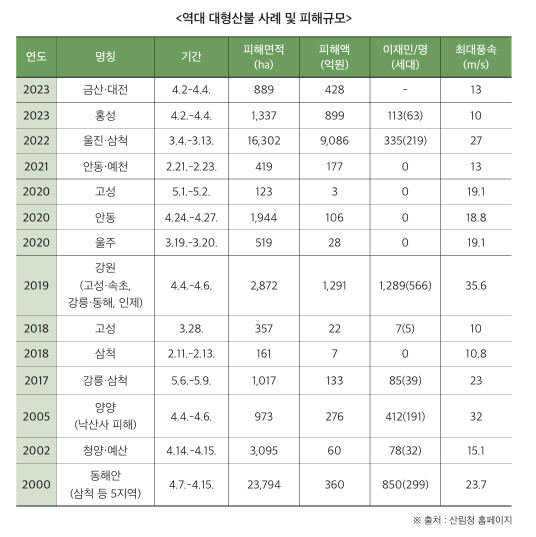

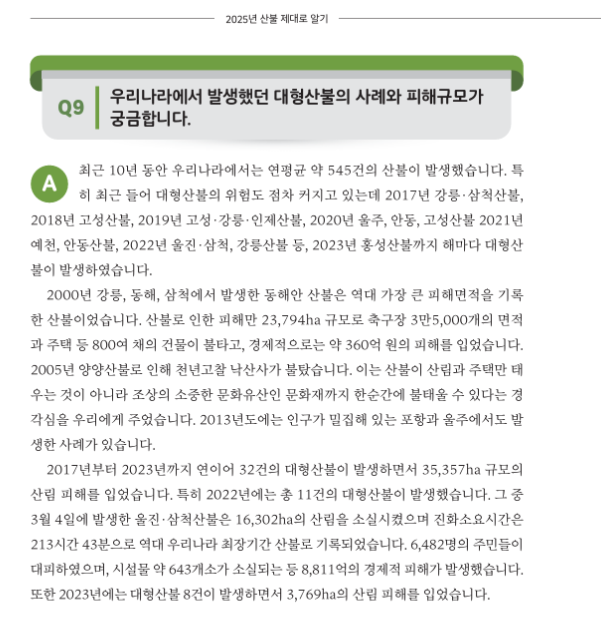

In [22]:

!apt-get -qq -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np
import os


font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


✅ 한글 폰트 NanumGothic 적용 완료!


In [4]:
df = pd.read_excel('산불통계자료.xlsx', sheet_name='Sheet1')
df['산불건수'] = pd.to_numeric(df['산불건수'], errors='coerce')
df['산불면적'] = pd.to_numeric(df['산불면적(ha)'], errors='coerce')
df['강수량'] = pd.to_numeric(df['강수량(mm)'], errors='coerce')

In [5]:
# 3. 결측값 제거
df_clean = df.dropna()

In [6]:
# 전체 데이터 출력
for sido in df['시도'].unique():
    print(f"\n{sido} 데이터:")
    print(df[df['시도'] == sido])



강원특별자치도 데이터:
         시도    연도   산불건수 산불면적(ha) 강수량(mm)     산불면적     강수량
0   강원특별자치도  2014   73.0    20.03    1006    20.03  1006.0
1   강원특별자치도  2015  125.0   237.21   893.9   237.21   893.9
2   강원특별자치도  2016   91.0    50.72  1065.1    50.72  1065.1
3   강원특별자치도  2017  103.0  1195.87  1101.8  1195.87  1101.8
4   강원특별자치도  2018   47.0   674.18    1450   674.18  1450.0
5   강원특별자치도  2019   78.0  3001.49  1094.6  3001.49  1094.6
6   강원특별자치도  2020   74.0   220.48  1575.1   220.48  1575.1
7   강원특별자치도  2021   49.0    90.17  1129.9    90.17  1129.9
8   강원특별자치도  2022   78.0  5272.72  1465.4  5272.72  1465.4
9   강원특별자치도  2023   66.0   250.73    1449   250.73  1449.0
10  강원특별자치도  2024   30.0    19.26  1298.5    19.26  1298.5

경기도 데이터:
     시도    연도   산불건수 산불면적(ha) 강수량(mm)   산불면적     강수량
11  경기도  2014   48.0     5.47     799   5.47   799.0
12  경기도  2015  150.0    94.31     820  94.31   820.0
13  경기도  2016  113.0    51.69  1016.1  51.69  1016.1
14  경기도  2017  161.0    55.04  1094.9  55.04  1094.9
15 

In [7]:
#10년간 총 산불건수
print(df.groupby('시도')['산불건수'].sum())

시도
강원특별자치도     814.0
경기도        1347.0
경상남도        522.0
경상북도        956.0
광주광역시        38.0
대구광역시       119.0
대전광역시        74.0
부산광역시       148.0
서울특별시       114.0
세종특별자치시      43.0
울산광역시       132.0
인천광역시       205.0
전라남도        450.0
전북특별자치도     296.0
제주특별자치도       3.0
충청남도        419.0
충청북도        267.0
Name: 산불건수, dtype: float64


In [8]:
#시도별 10년간 평균 산불건수, 평균 강수량 테이블
group_df =df.groupby('시도')[['산불건수', '강수량']].mean().reset_index()
group_df

,시도,산불건수,강수량
0,강원특별자치도,74.000000,1229.936364
1,경기도,122.454545,1220.363636
2,경상남도,47.454545,1523.500000
3,경상북도,86.909091,1154.772727
4,광주광역시,3.454545,1343.672727
5,대구광역시,10.818182,999.500000
6,대전광역시,6.727273,1286.563636
7,부산광역시,13.454545,1655.418182
8,서울특별시,10.363636,1229.490909
9,세종특별자치시,4.300000,1423.033333


# 지역,연도별 산불건수와 산불면적

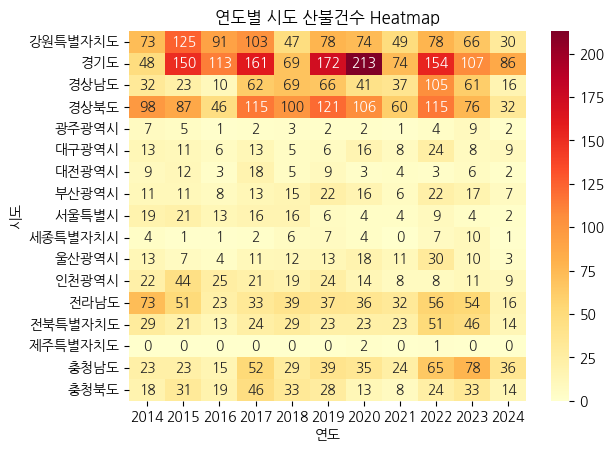

In [39]:
pivot = df.pivot_table(index='시도', columns='연도', values='산불건수', aggfunc='sum')
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('연도별 시도 산불건수 Heatmap')
plt.show()


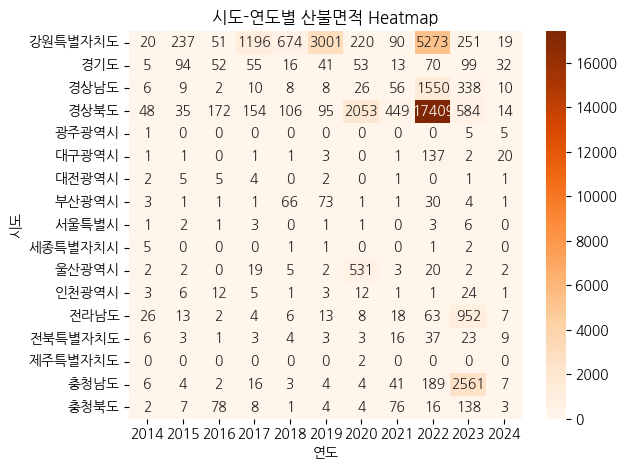

In [48]:
pivot_area = df.pivot_table(index='시도', columns='연도', values='산불면적', aggfunc='sum')
sns.heatmap(pivot_area, cmap='Oranges', annot=True, fmt='.0f')
plt.title('시도-연도별 산불면적 Heatmap')
plt.xlabel('연도')
plt.ylabel('시도')
plt.tight_layout()
plt.show()


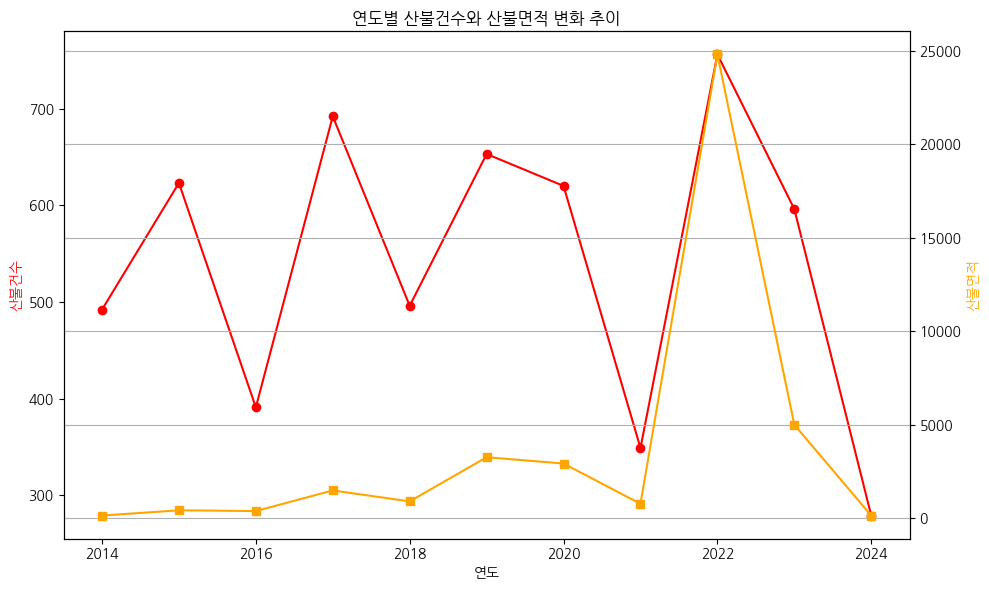

In [50]:
df_year = df.groupby('연도')[['산불건수', '산불면적']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.plot(df_year['연도'], df_year['산불건수'], color='r', marker='o', label='산불건수')
ax2.plot(df_year['연도'], df_year['산불면적'], color='orange', marker='s', label='산불면적')

ax1.set_xlabel('연도')
ax1.set_ylabel('산불건수', color='r')
ax2.set_ylabel('산불면적', color='orange')
plt.title('연도별 산불건수와 산불면적 변화 추이')
plt.grid(True)
plt.tight_layout()
plt.show()


# 산불건수와 강수량의 상관관계


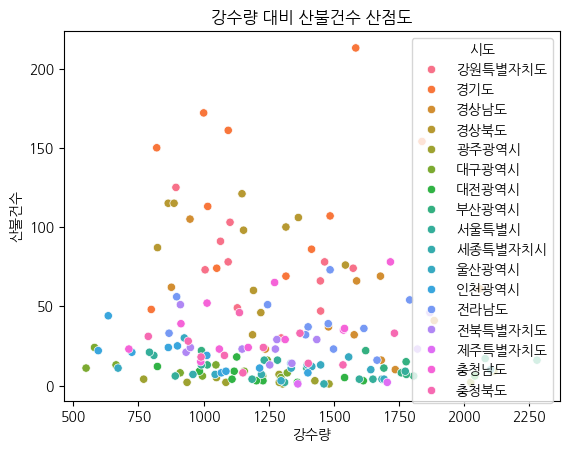

In [ ]:
sns.scatterplot(data=df, x='강수량', y='산불건수', hue='시도')
plt.title('강수량 대비 산불건수 산점도')
plt.show()

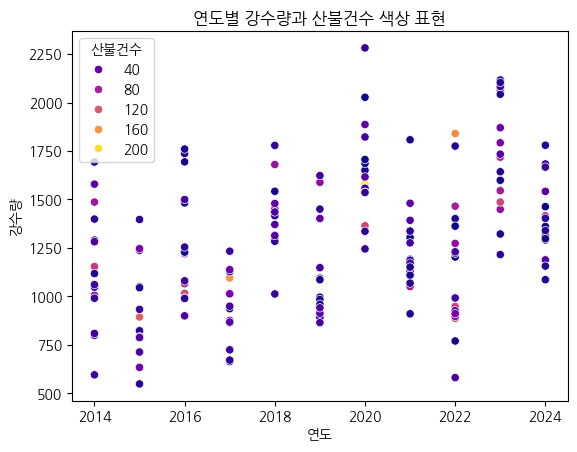

In [ ]:
sns.scatterplot(data=df, x='연도', y='강수량', hue='산불건수', palette='plasma')
plt.title('연도별 강수량과 산불건수 색상 표현')
plt.show()

# 산불건수와 강수량의 상관관계 subplot


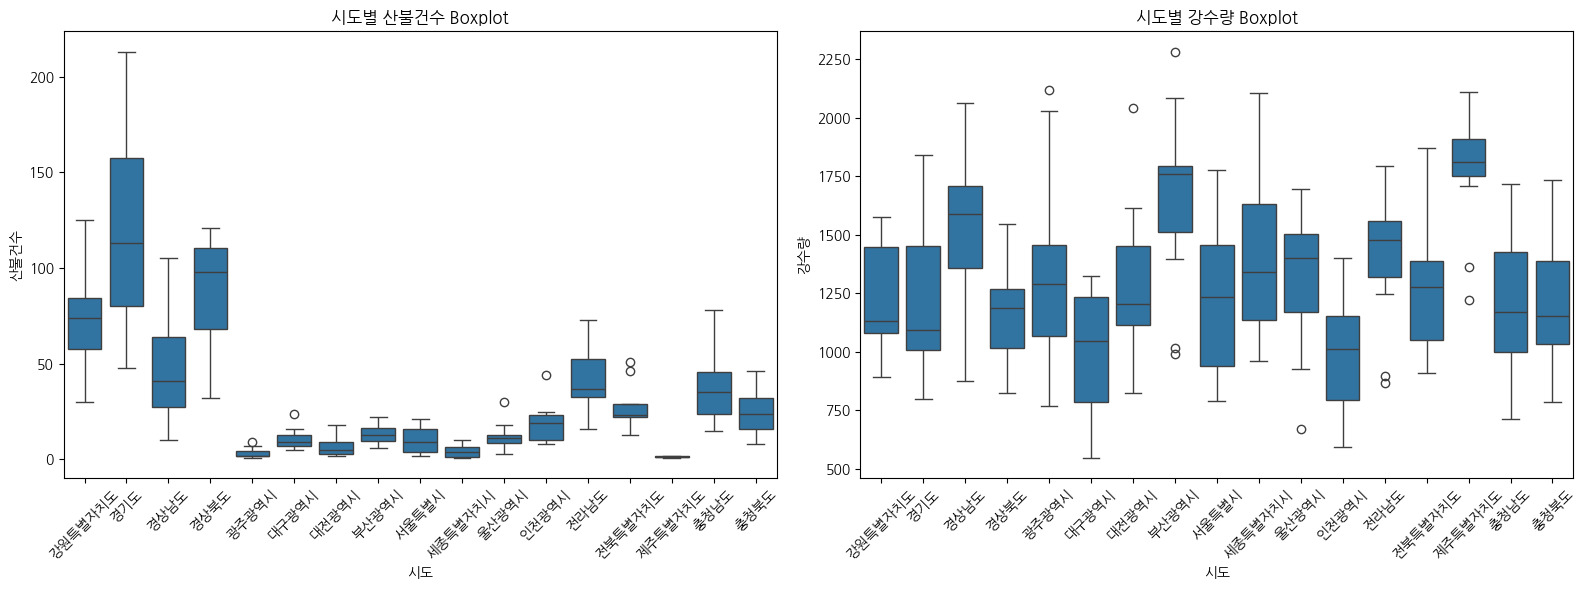

In [9]:

plt.figure(figsize=(16, 6))

# 1. 시도별 산불건수 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='시도', y='산불건수')
plt.xticks(rotation=45)
plt.title('시도별 산불건수 Boxplot')
plt.xlabel('시도')
plt.ylabel('산불건수')

# 2. 시도별 강수량 Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='시도', y='강수량')
plt.xticks(rotation=45)
plt.title('시도별 강수량 Boxplot')
plt.xlabel('시도')
plt.ylabel('강수량')


plt.tight_layout()
plt.show()


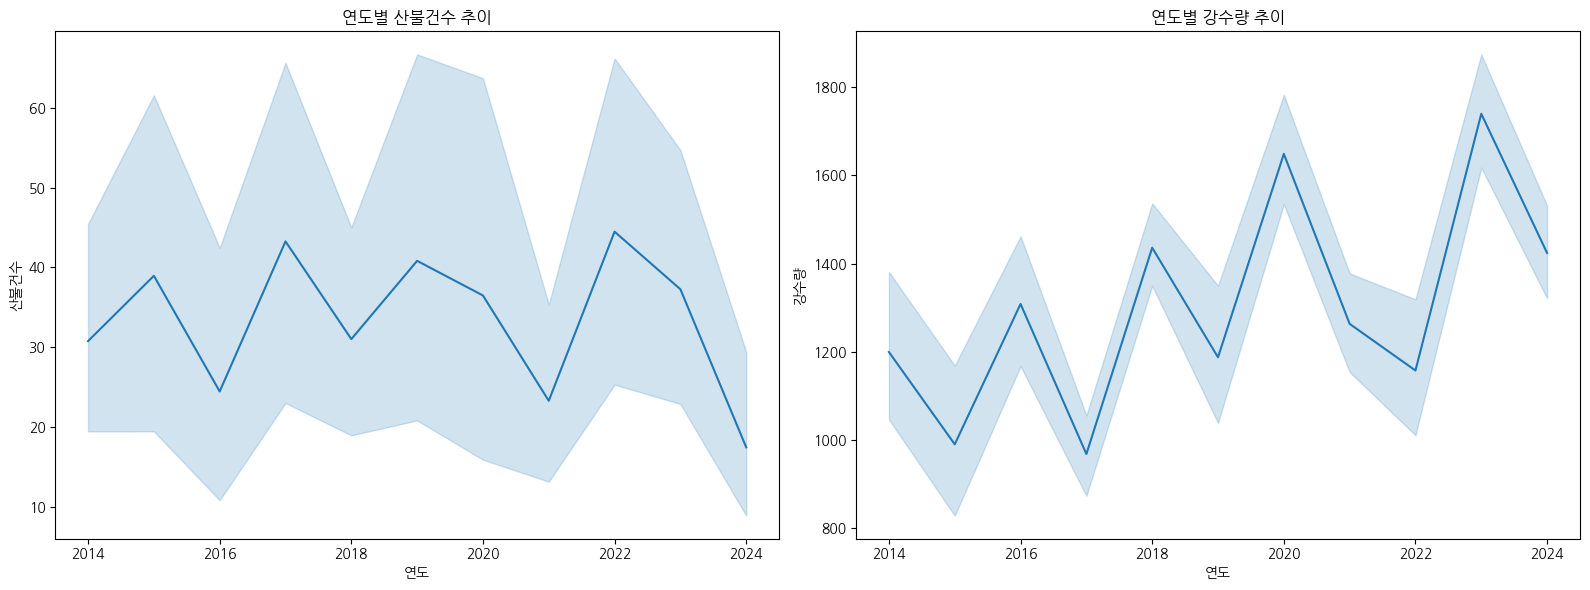

In [10]:
!apt-get -qq install fonts-nanum

plt.figure(figsize=(16, 6))

# 1. 연도별 산불건수 lineplot
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='연도', y='산불건수')
plt.title('연도별 산불건수 추이')
plt.xlabel('연도')
plt.ylabel('산불건수')

# 2. 연도별 강수량 lineplot
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='연도', y='강수량')
plt.title('연도별 강수량 추이')
plt.xlabel('연도')
plt.ylabel('강수량')


plt.tight_layout()
plt.show()


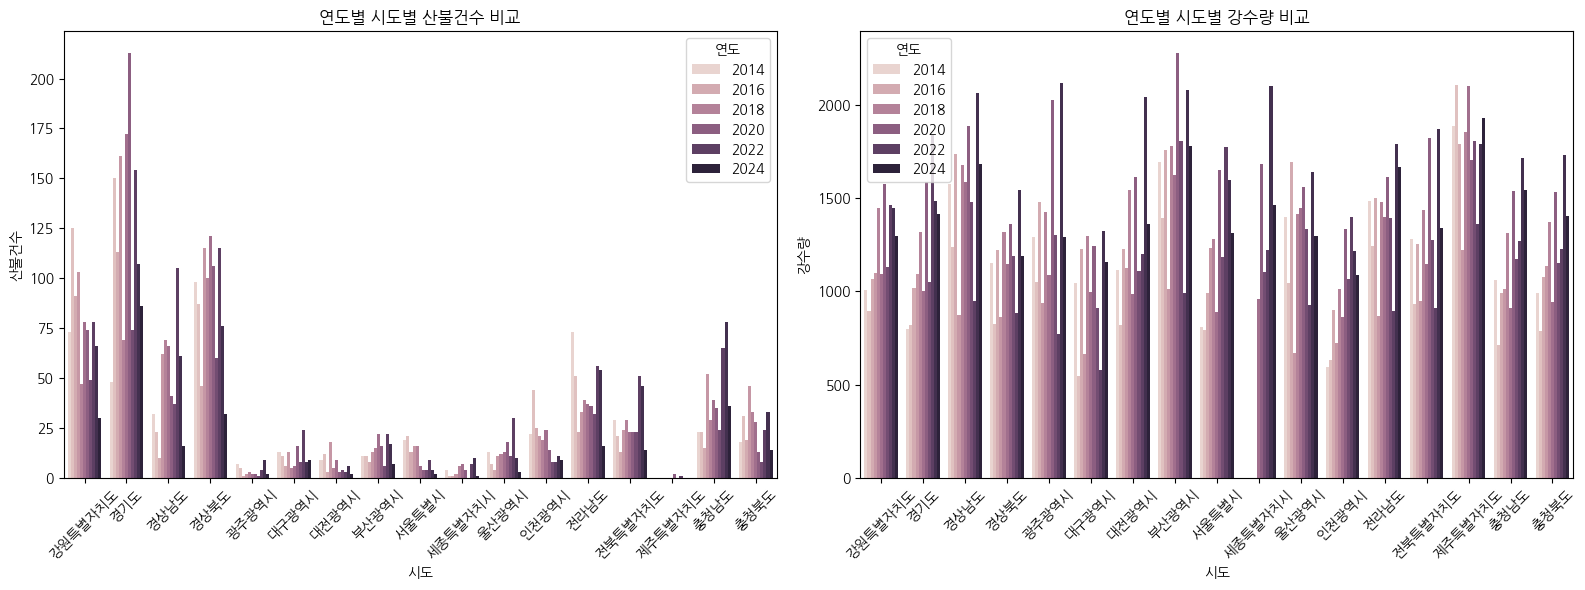

In [11]:
plt.figure(figsize=(16, 6))

# 1. 연도별 산불건수 barplot
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='시도', y='산불건수', hue='연도')
plt.xticks(rotation=45)
plt.title('연도별 시도별 산불건수 비교')


# 2. 연도별 강수량 barplot
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='시도', y='강수량', hue='연도')
plt.xticks(rotation=45)
plt.title('연도별 시도별 강수량 비교')



plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


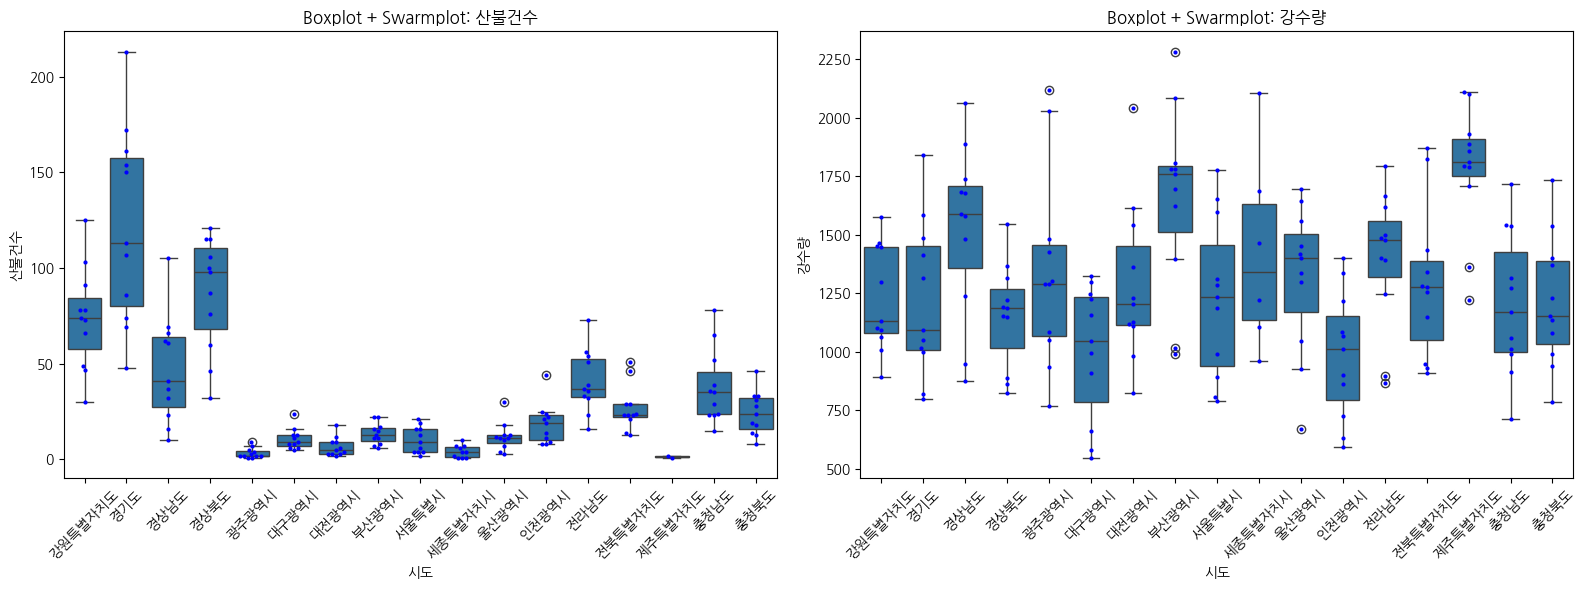

In [12]:
plt.figure(figsize=(16, 6))

# 1. 연도별 산불건수 boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='시도', y='산불건수')
sns.swarmplot(data=df, x='시도', y='산불건수', color='blue', size=3)
plt.xticks(rotation=45)
plt.title('Boxplot + Swarmplot: 산불건수')


# 2. 연도별 강수량 boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='시도', y='강수량')
sns.swarmplot(data=df, x='시도', y='강수량', color='blue', size=3)
plt.xticks(rotation=45)
plt.title('Boxplot + Swarmplot: 강수량')


plt.tight_layout()
plt.show()

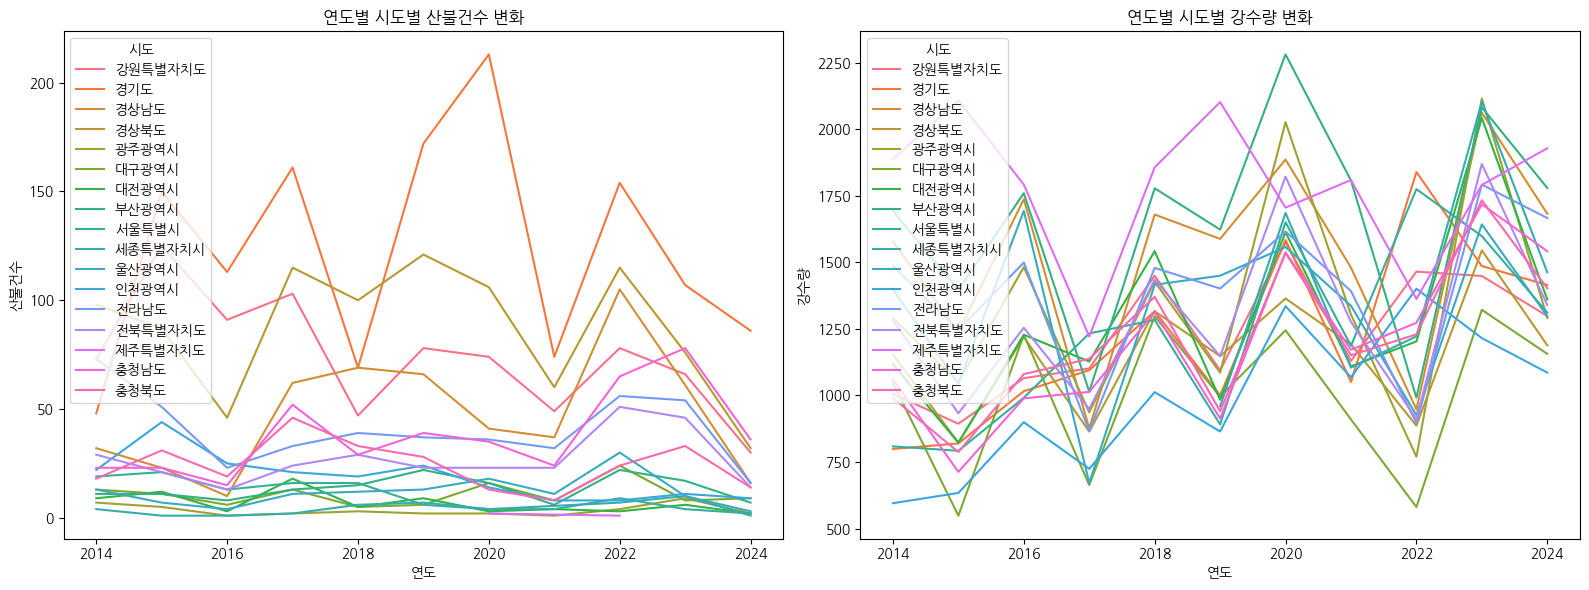

In [17]:
plt.figure(figsize=(16, 6))

# 1. 연도별 산불건수 lineplot
plt.subplot(1, 2, 1)
sns.lineplot(data=df, x='연도', y='산불건수', hue='시도')
plt.title('연도별 시도별 산불건수 변화')


# 2. 연도별 강수량 lineplot
plt.subplot(1, 2, 2)
sns.lineplot(data=df, x='연도', y='강수량', hue='시도')
plt.title('연도별 시도별 강수량 변화')


plt.tight_layout()
plt.show()

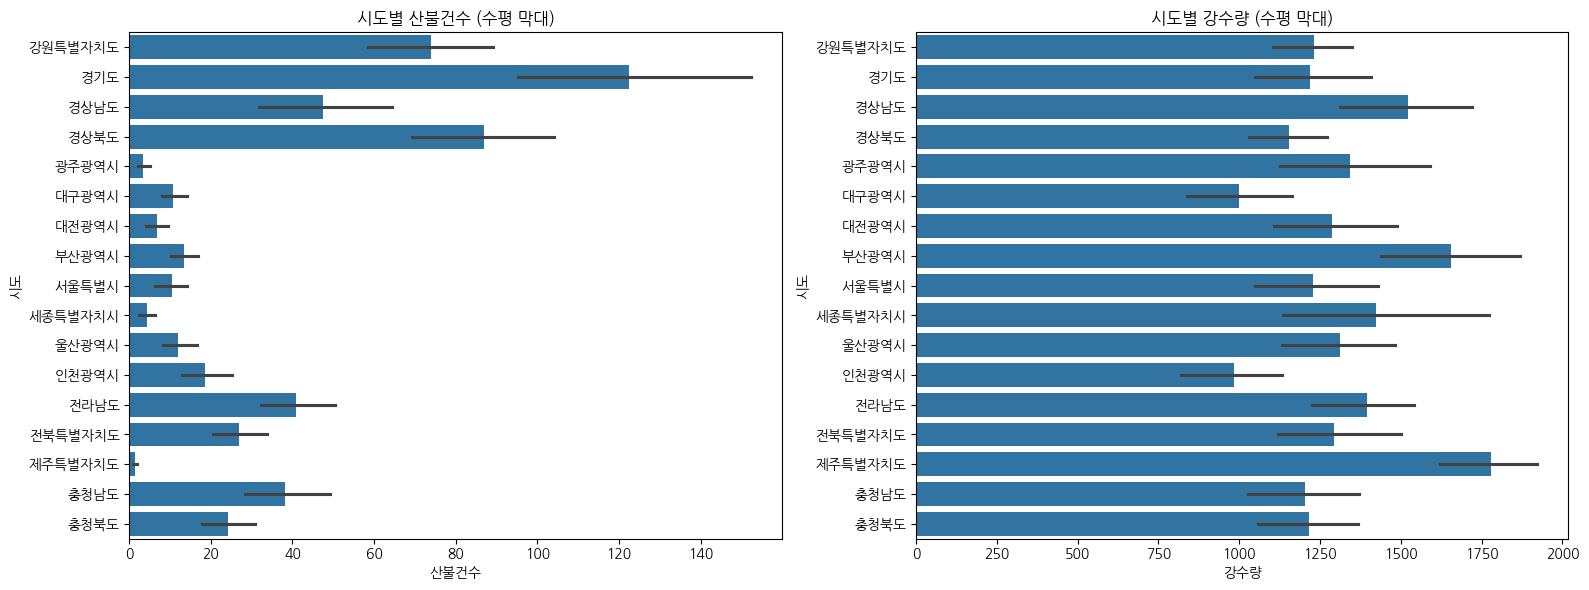

In [20]:
plt.figure(figsize=(16, 6))

# 1. 연도별 산불건수 barplot
plt.subplot(1, 2, 1)
sns.barplot(data=df, y='시도', x='산불건수', orient='h')
plt.title('시도별 산불건수 (수평 막대)')


# 2. 연도별 강수량 barplot
plt.subplot(1, 2, 2)
sns.barplot(data=df, y='시도', x='강수량', orient='h')
plt.title('시도별 강수량 (수평 막대)')


plt.tight_layout()
plt.show()

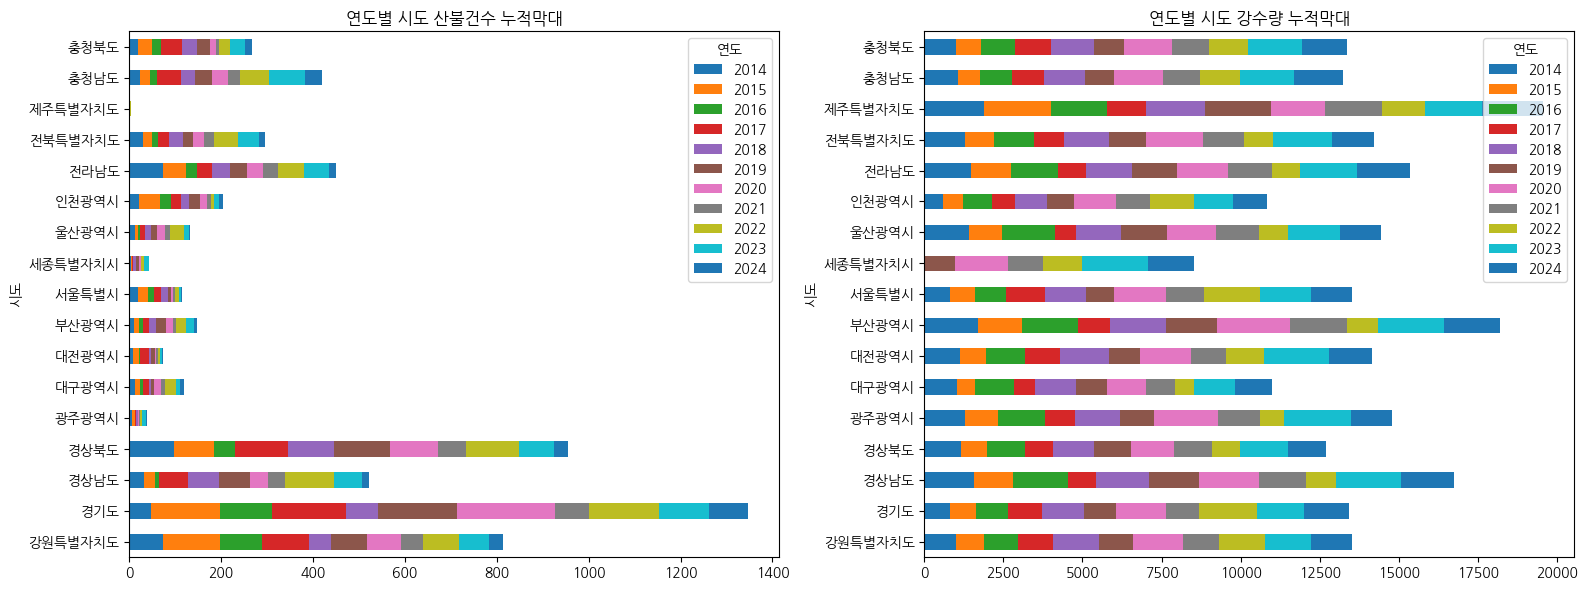

In [21]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 연도별 산불건수 누적막대
pivot_df1 = df.pivot_table(index='시도', columns='연도', values='산불건수', aggfunc='sum')
pivot_df1.plot(kind='barh', stacked=True, ax=axes[0])
axes[0].set_title('연도별 시도 산불건수 누적막대')

# 2. 연도별 강수량 누적막대
pivot_df2 = df.pivot_table(index='시도', columns='연도', values='강수량', aggfunc='sum')
pivot_df2.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('연도별 시도 강수량 누적막대')

plt.tight_layout()
plt.show()


# 산불건수와 강수량의 상관관계 (비교)

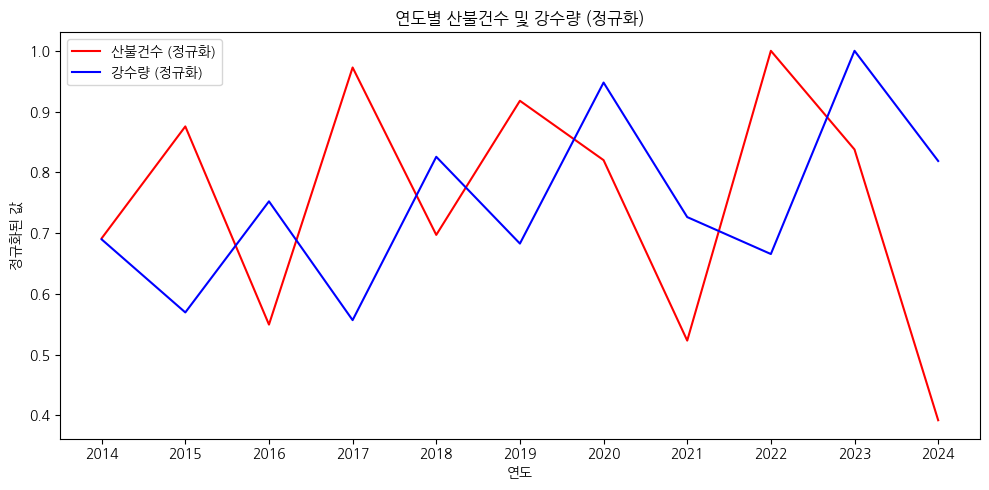

In [ ]:
plt.figure(figsize=(10, 5))
df_grouped = df.groupby('연도')[['산불건수', '강수량']].mean().reset_index()

# 정규화
df_grouped['산불건수_norm'] = df_grouped['산불건수'] / df_grouped['산불건수'].max()
df_grouped['강수량_norm'] = df_grouped['강수량'] / df_grouped['강수량'].max()

sns.lineplot(data=df_grouped, x='연도', y='산불건수_norm', label='산불건수 (정규화)', color='red')
sns.lineplot(data=df_grouped, x='연도', y='강수량_norm', label='강수량 (정규화)', color='blue')
plt.title("연도별 산불건수 및 강수량 (정규화)")
plt.ylabel("정규화된 값")
plt.xticks(df_grouped['연도'])
plt.tight_layout()
plt.show()


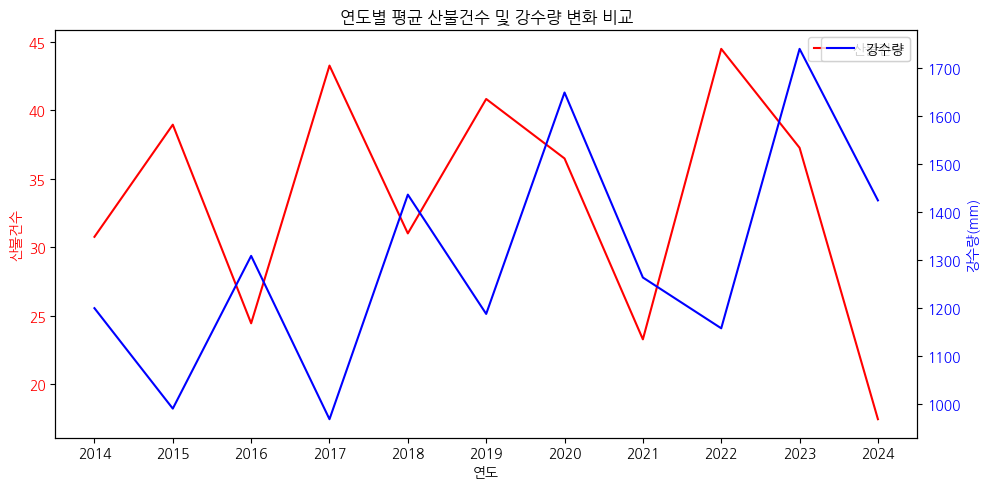

In [ ]:
plt.figure(figsize=(10, 5))

# 1. x축과 산불건수 y축
ax1 = sns.lineplot(data=df_grouped, x='연도', y='산불건수', color='r', label='산불건수')
ax1.set_ylabel('산불건수', color='r')
ax1.tick_params(axis='y', labelcolor='r')

# 2. y축 공유하지만 강수량용 보조 y축 생성
ax2 = ax1.twinx()
sns.lineplot(data=df_grouped, x='연도', y='강수량', ax=ax2, color='b', label='강수량')
ax2.set_ylabel('강수량(mm)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# 3. 제목, x축 설정
plt.title("연도별 평균 산불건수 및 강수량 변화 비교")
ax1.set_xlabel('연도')
ax1.set_xticks(df_grouped['연도'])

plt.tight_layout()
plt.show()


지역명을 입력하세요: 경상남도


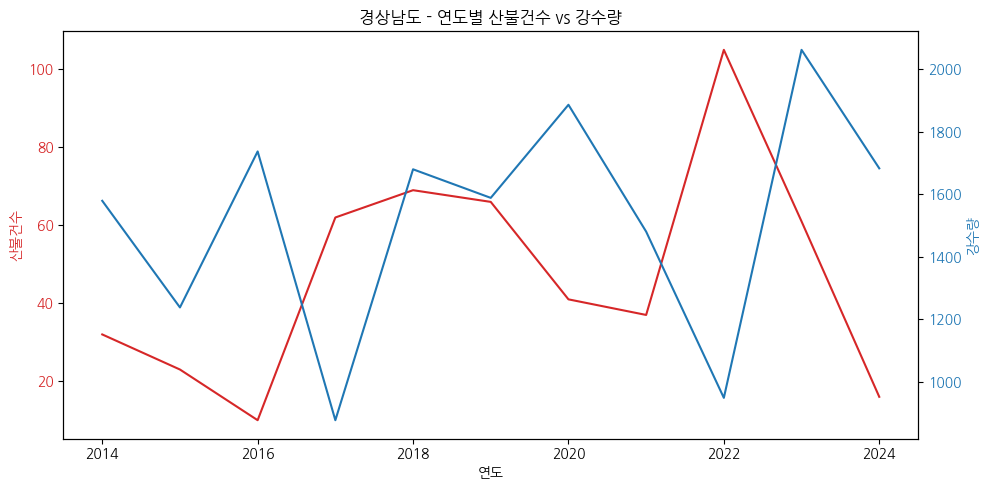

In [24]:
import matplotlib.pyplot as plt

def plot_fire_rain_by_region(region_name):
    df_region = df[df['시도'] == region_name]

    if df_region.empty:
        print(f"'{region_name}'에 해당하는 데이터가 없습니다.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 5))

    color1 = 'tab:red'
    ax1.set_xlabel('연도')
    ax1.set_ylabel('산불건수', color=color1)
    ax1.plot(df_region['연도'], df_region['산불건수'], color=color1, label='산불건수')
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'tab:blue'
    ax2.set_ylabel('강수량', color=color2)
    ax2.plot(df_region['연도'], df_region['강수량'], color=color2, label='강수량')
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(f'{region_name} - 연도별 산불건수 vs 강수량')
    fig.tight_layout()
    plt.show()


region = input("지역명을 입력하세요: ")
plot_fire_rain_by_region(region)


In [29]:

corr = yearly[['강수량', '산불건수', '산불면적']].corr()
print("상관계수:\n", corr)



상관계수:
            강수량      산불건수      산불면적
강수량   1.000000 -0.255664 -0.073428
산불건수 -0.255664  1.000000  0.567953
산불면적 -0.073428  0.567953  1.000000
